In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
device = 'cpu'

In [3]:
n_shots = 115

n_sources_per_shot = 1
d_source = 20  # 20 * 4m = 80m
first_source = 10  # 10 * 4m = 40m
source_depth = 2  # 2 * 4m = 8m

n_receivers_per_shot = 384
d_receiver = 6  # 6 * 4m = 24m
first_receiver = 0  # 0 * 4m = 0m
receiver_depth = 2  # 2 * 4m = 8m

freq = 25
nt = 750
dt = 0.004
peak_time = 1.5 / freq

In [4]:
observed_data = (
    torch.from_file('marmousi_data.bin',
                    size=n_shots*n_receivers_per_shot*nt)
    .reshape(n_shots, n_receivers_per_shot, nt)
)

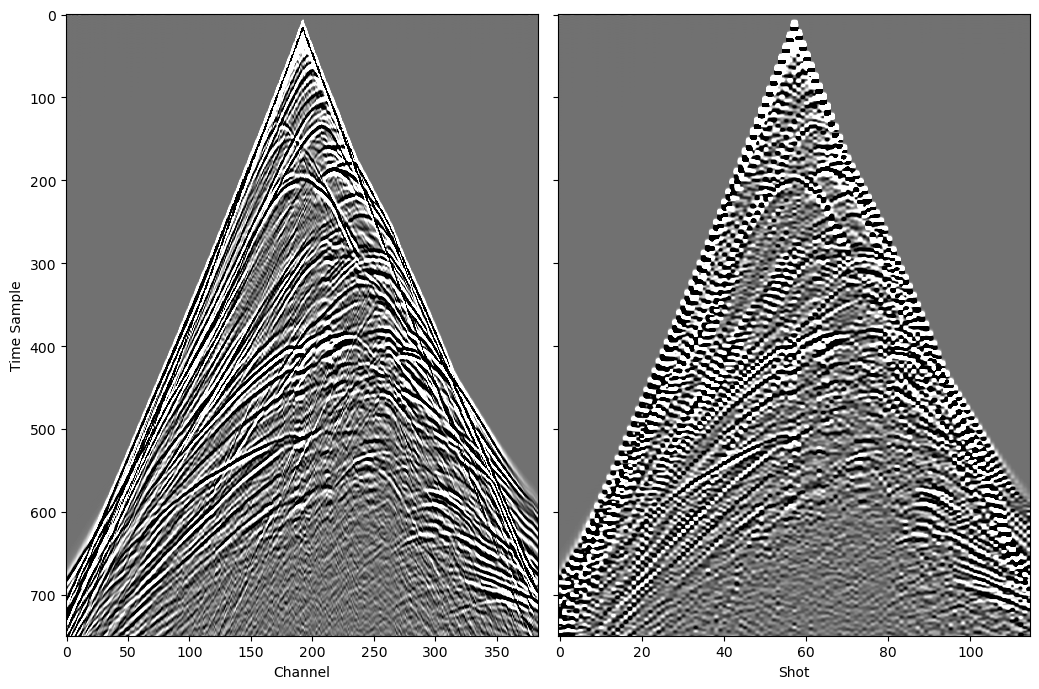

In [5]:
vmin, vmax = torch.quantile(observed_data[0],
                            torch.tensor([0.05, 0.95]).to(device))
_, ax = plt.subplots(1, 2, figsize=(10.5, 7), sharey=True)
ax[0].imshow(observed_data[57].cpu().T, aspect='auto', cmap='gray',
             vmin=vmin, vmax=vmax)
ax[1].imshow(observed_data[:, 192].cpu().T, aspect='auto', cmap='gray',
             vmin=vmin, vmax=vmax)
ax[0].set_xlabel("Channel")
ax[0].set_ylabel("Time Sample")
ax[1].set_xlabel("Shot")
plt.tight_layout()
plt.savefig('example_forward_model.jpg')